In [2]:
import numpy as np
import matplotlib.pyplot as plt

from jampy.legacy.jam_axi_rms import jam_axi_rms
from jampy.legacy.jam_axi_vel import jam_axi_vel



In [3]:
def jam_axi_vel_example():
    """
    Usage example for jam_axi_vel().
    It takes about 2s on a 2.5 GHz computer

    """
    np.random.seed(123)
    xbin, ybin = np.random.uniform(low=[-55, -40], high=[55, 40], size=[1000, 2]).T

    inc = 60.                                                # assumed galaxy inclination
    r = np.sqrt(xbin**2 + (ybin/np.cos(np.radians(inc)))**2) # Radius in the plane of the disk
    a = 40                                                   # Scale length in arcsec
    vr = 2000*np.sqrt(r)/(r+a)                               # Assumed velocity profile
    vel = vr * np.sin(np.radians(inc))*xbin/r                # Projected velocity field
    sig = 8700/(r+a)                                         # Assumed velocity dispersion profile
    rms = np.sqrt(vel**2 + sig**2)                           # Vrms field in km/s

    surf = np.array([39483., 37158., 30646., 17759., 5955.1, 1203.5, 174.36, 21.105, 2.3599, 0.25493])
    sigma = np.array([0.153, 0.515, 1.58, 4.22, 10, 22.4, 48.8, 105, 227, 525])
    qObs = np.full_like(sigma, 0.57)

    distance = 16.5   # Assume Virgo distance in Mpc (Mei et al. 2007)
    mbh = 1e8 # Black hole mass in solar masses
    beta = np.full_like(surf, 0.2)

    surf_lum = surf # Assume self-consistency
    sigma_lum = sigma
    qobs_lum = qObs
    surf_pot = surf
    sigma_pot = sigma
    qobs_pot = qObs

    sigmapsf = [0.6, 1.2]
    normpsf = [0.7, 0.3]
    pixsize = 0.8
    goodbins = r > 10  # Arbitrarily exclude the center to illustrate how to use goodbins

    # First the M/L is determined by fitting the Vrms.
    # In general beta_z and the inclination will also be
    # fitted at this stage as described in Cappellari (2008)

    rmsModel, ml, chi2, flux = jam_axi_rms(
        surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
        inc, mbh, distance, xbin, ybin, plot=True, rms=rms, goodbins=goodbins,
        sigmapsf=sigmapsf, beta=beta, pixsize=pixsize, tensor='zz', normpsf=normpsf)
    plt.pause(1)

    # The velocity is fitted at the best fitting M/L, beta_z and
    # inclination determined at the previous stage

    surf_pot *= ml  # Scale the density by the best fitting M/L
    velModel, kappa, chi2, flux = jam_axi_vel(
        surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
        inc, mbh, distance, xbin, ybin, plot=True, vel=vel, goodbins=goodbins,
        sigmapsf=sigmapsf, beta=beta, pixsize=pixsize, component='z', normpsf=normpsf)
    plt.pause(1)


jam_axi_rms elapsed time sec: 0.69
inc=60.0 beta_z=0.20 M/L=1.18 BH=1.18e+08 chi2/DOF=0.829
Total mass MGE: 6.627e+10


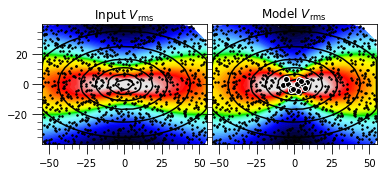

jam_axis_vel elapsed time sec: 0.98
inc=60.0 kappa=0.86 beta_z=0.20 BH=1.00e+08 chi2/DOF=2.77
Total mass MGE 6.625e+10:


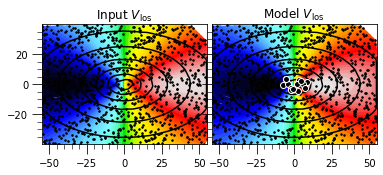

In [5]:
if __name__ == '__main__':

    jam_axi_vel_example()
